### <font color = darkred> Chicago crime level 2 analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"C:\Users\nklmy\Downloads\Crimes_-_2001_to_Present.csv")

In [3]:
dataset.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8167406 entries, 0 to 8167405
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [5]:
dataset.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     13599
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614829
Community Area          613453
FBI Code                     0
X Coordinate             89893
Y Coordinate             89893
Year                         0
Updated On                   0
Latitude                 89893
Longitude                89893
Location                 89893
dtype: int64

In [6]:
# Task 1: From what date is the oldest data point in the data set?

oldest_date = dataset['Date'].min()

In [7]:
oldest_date

'01/01/2001 01:00:00 AM'

In [8]:
type(oldest_date)

str

In [9]:
# Task 2: which year has the highest number of crimes?

crime_counts = dataset.groupby('Year').size()
print(crime_counts)
year_h_crime= crime_counts.idxmax()
total_crime = crime_counts.max()
print(f"\nYear with highest number of crimes is {year_h_crime} with {total_crime} crimes")

Year
2001    485924
2002    486826
2003    475990
2004    469433
2005    453778
2006    448191
2007    437095
2008    427197
2009    392845
2010    370541
2011    352018
2012    336341
2013    307569
2014    275850
2015    264853
2016    269917
2017    269194
2018    269044
2019    261506
2020    212489
2021    209357
2022    239542
2023    262519
2024    189387
dtype: int64
Year with highest number of crimes is 2002 with 486826 crimes


In [10]:
#Task 3 Let's define "Arrest Rate" as the share of crimes that led to an arrest.

#What year had the highest arrest rate? What is the overall trend in number of crimes per year?

#find arrest_rate and then calculate total_arrests per year

arrest_count = dataset.groupby('Year')['Arrest'].sum()

#Calculate total cases per year
total_cases = dataset.groupby('Year')['Case Number'].count()

#Calculate the arrest rate per year
arrest_rate = arrest_count / total_cases

#Determine the year with the highest arrest rate
year_h_ar_rate = arrest_rate.idxmax()
highest_arrest_rate = arrest_rate.max()

print(f"\nYear with highest arrest rate is {year_h_ar_rate} and the arrest_rate is {highest_arrest_rate}")



2005
0.3105659595661315


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


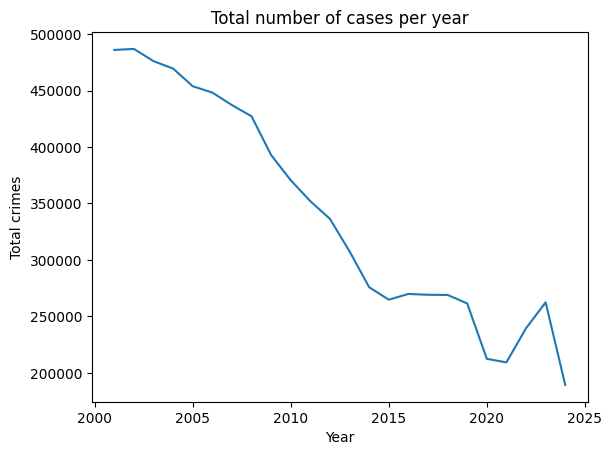

In [11]:
#plot the number of crimes per year
total_cases.plot(kind = 'line', title = 'Total number of cases per year', ylabel = 'Total crimes', xlabel = 'Year')
plt.show()


#### Downward Trend as the year increases Total crimes decreases until 2021,
#### There is a gradual increase in crime rate from 2021 to 2022 due to covid crisis followed by negative trend

                    Five Crime  Arrest Count  Arrest rate
Primary Type                                             
ASSAULT                  18257          2331     0.127677
BATTERY                  41515          6919     0.166663
CRIMINAL DAMAGE          24877          1179     0.047393
DECEPTIVE PRACTICE       18503           387     0.020916
THEFT                    41340          2804     0.067828
crime with highest crime rate is BATTERY and the rate is 16.67%
crime with lowest crime rate is DECEPTIVE PRACTICE and the rate is 2.09%


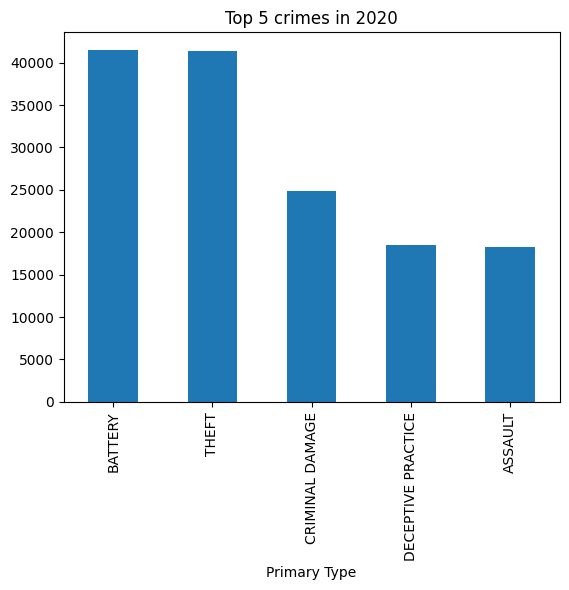

In [12]:
# Task 4

# What were the five most common crimes in 2020? Which of those crimes had the highest and lowest arrest rate?

#Dataset filtering for the year 2020
dataset_2020 = dataset[dataset['Year'] == 2020]
crime_count_2020 = dataset_2020.groupby('Primary Type')['Case Number'].size()
five_crimes = crime_count_2020.nlargest(5)
five_crimes

#Top 5 most common crimes

top_5_crime_data = dataset_2020[dataset_2020['Primary Type'].isin(five_crimes.index)]

#Calculating the number of arrests for each of the top 5 crimes
arrest_count = top_5_crime_data.groupby('Primary Type')['Arrest'].sum()

arrest_rate = arrest_count/five_crimes

result = pd.DataFrame({'Five Crime': five_crimes,'Arrest Count': arrest_count, 'Arrest rate': arrest_rate})

h_arr_rate = result['Arrest rate'].max()
l_arr_rate = result['Arrest rate'].min()

h_arr_rate_index = result[result['Arrest rate'] == h_arr_rate].index[0]
l_arr_rate_index = result[result['Arrest rate'] == l_arr_rate].index[0]

print(result)


print(f"crime with highest crime rate is {h_arr_rate_index} and the rate is{h_arr_rate : .2%}")
print(f"crime with lowest crime rate is {l_arr_rate_index} and the rate is{l_arr_rate: .2%}")
five_crimes.plot(kind = 'bar', title = 'Top 5 crimes in 2020')
plt.show()

In [13]:
#Task 5
#Investigate which year that had the highest number of crimes leading to an arrest.
#What year was it, and how many arrests were made during that year?

arrest_count = dataset.groupby('Year')['Arrest'].sum()
total_cases = dataset.groupby('Year')['Case Number'].count()

#year with the highest number of arrests.
highest_arrest_count = arrest_count.idxmax()

#Determine the  highest arrest rate
year_h_arrest = arrest_count.max()

print(arrest_count)
print(total_cases)

print(f"\nHighest number of arrests happened in the year {highest_arrest_count} with arrests count = {year_h_arrest}")


Year
2001    141942
2002    141578
2003    141600
2004    144705
2005    140928
2006    135426
2007    131880
2008    110026
2009    110840
2010    100555
2011     96299
2012     90679
2013     86568
2014     79658
2015     70058
2016     53049
2017     52666
2018     53892
2019     56250
2020     34153
2021     26538
2022     28050
2023     31733
2024     25016
Name: Arrest, dtype: int64
Year
2001    485924
2002    486826
2003    475990
2004    469433
2005    453778
2006    448191
2007    437095
2008    427197
2009    392845
2010    370541
2011    352018
2012    336341
2013    307569
2014    275850
2015    264853
2016    269917
2017    269194
2018    269044
2019    261506
2020    212489
2021    209357
2022    239542
2023    262519
2024    189387
Name: Case Number, dtype: int64

Highest number of arrests happened in the year 2004 with arrests count = 144705


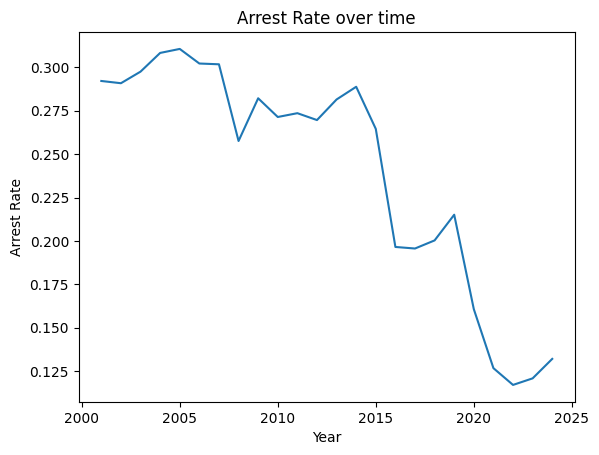

Year
2001    0.292107
2002    0.290818
2003    0.297485
2004    0.308255
2005    0.310566
2006    0.302161
2007    0.301719
2008    0.257553
2009    0.282147
2010    0.271373
2011    0.273563
2012    0.269604
2013    0.281459
2014    0.288773
2015    0.264517
2016    0.196538
2017    0.195643
2018    0.200309
2019    0.215100
2020    0.160728
2021    0.126760
2022    0.117098
2023    0.120879
2024    0.132089
dtype: float64


In [14]:
#Task 6
'''How has the arrest rate looked like over time? 
Plot the trend of the arrest rate.
Between which years can you see the biggest change in "Arrest Rate"? Can you point at specific reasons to why the Arrest Rate dropped between those years? Comment on your conclusions.

Since the data set is constantly updating, disregard the year 2021 and later for the analysis in this question.
'''
arrest_count = dataset.groupby('Year')['Arrest'].sum()
total_cases = dataset.groupby('Year')['Case Number'].count()
arrest_rate = arrest_count/total_cases

arrest_rate.plot(kind = 'line',title ='Arrest Rate over time',xlabel = 'Year',ylabel = 'Arrest Rate')
plt.show()

print(arrest_rate)


In [15]:
#change in arrest_rate

arrest_rate_diff = arrest_rate.diff().abs()

#year with biggest change in Arrest Rate

h_arr_rate_diff = arrest_rate_diff.idxmax()

h_arr_rate =arrest_rate_diff.max()

print(f"\nIn the year {h_arr_rate_diff}, there is a biggest change in the arrest rate of {h_arr_rate}")


In the year 2016, there is a biggest change in the arrest rate of 0.06797834806424205


#### Negetive trend as the year increases , arrest rate decreases with a notable decrease between 2016 and 2020. 
#### It might be due to change in laws, arrest policies, lack of police officers.

In [22]:
'''Task 7
What was the arrest rate for thefts during 2017 and 2018?
How much did the arrest rate decrease between those two years?

Perform a t-test to determine if the decrease in arrest rate is significant at a 95% confidence level.'''

#A t-test requires two arrays or lists of values for comparison. 

#convert date column into datetime datatype

dataset['Date'] = pd.to_datetime(dataset['Date'])

#extract the month from the date column

dataset['Month'] = dataset['Date'].dt.month

In [17]:
#filtering theft-related data

theft_dataset = dataset[dataset['Primary Type'] == 'THEFT']

print(theft_dataset.shape) 


(1728401, 23)


In [18]:
#calculating arrest count and total cases for theft dataset by Year and Month grouping 

arrest_count = theft_dataset.groupby(['Year','Month'])['Arrest'].sum()

total_cases = theft_dataset.groupby(['Year','Month'])['Case Number'].count()

arrest_rate = arrest_count/total_cases

print(arrest_count)


Year  Month
2001  1        1426
      2        1139
      3        1283
      4        1227
      5        1290
               ... 
2024  5         326
      6         301
      7         373
      8         380
      9         258
Name: Arrest, Length: 285, dtype: int64


In [19]:
#arrest rate for thefts in 2017 and 2018

arr_rate_2017 = arrest_rate.loc[2017]
arr_rate_2018 = arrest_rate.loc[2018]

print(arr_rate_2017)
print(arr_rate_2018)

diff = arr_rate_2018.mean() - arr_rate_2017.mean()

print(diff)
print(type(arrest_rate))

print(type(arr_rate_2017))


Month
1     0.107121
2     0.112096
3     0.102644
4     0.112222
5     0.102848
6     0.099603
7     0.095551
8     0.087407
9     0.098969
10    0.091718
11    0.094928
12    0.109711
dtype: float64
Month
1     0.103171
2     0.122821
3     0.111345
4     0.105621
5     0.094109
6     0.090774
7     0.091115
8     0.084992
9     0.090391
10    0.091182
11    0.099768
12    0.095205
dtype: float64
-0.002860328280831312
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [20]:
# A t-test will determine if this decrease in 2018 arrest rate is due to chance or reflects a real trend.

from scipy import stats

# Perform t-test to check if the difference between 2017 and 2018 is statistically significant

t_stat, p_value = stats.ttest_ind(arr_rate_2017, arr_rate_2018)

print(t_stat, p_value)

# Check significance at 95% confidence level

if p_value < 0.05:
    print("The difference in arrest rates between 2017 and 2018 is statistically significant.")
else:
    print("The difference in arrest rates between 2017 and 2018 is not statistically significant.")


0.7370472237493668 0.46888175954980227
The difference in arrest rates between 2017 and 2018 is not statistically significant.
